In [1]:
pwd

'C:\\Users\\7-2009-1186-16\\Desktop\\vibration_data'

In [1]:
# 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt

# 정상 상태 데이터 로드
data_normal = pd.read_csv('./csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_19.csv')

# 비정상 상태 데이터 로드
data_abnormal = pd.read_csv('300rpm(diff)/Fault2/fault_data_2023_12_14_15_0.csv')

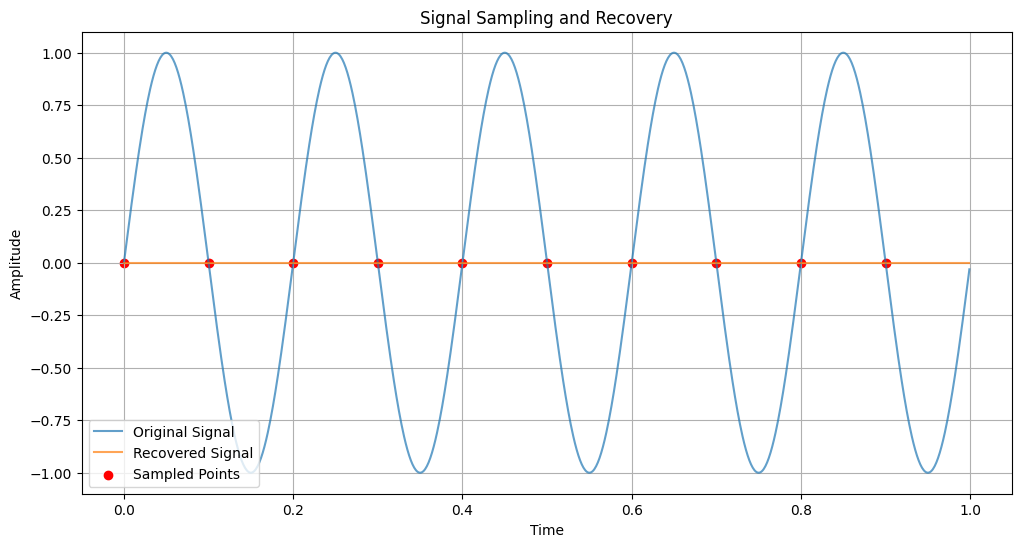

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 원래 신호 생성 (예: 사인파)
t = np.linspace(0, 1, 1000, endpoint=False)  # 시간 벡터
original_signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz의 사인파

# 샘플링 (예: Nyquist 이론에 따라 적절한 샘플링 빈도로)
sampling_rate = 10  # 샘플링 빈도 (10 Hz)
sample_points = np.arange(0, 1, 1/sampling_rate)
sampled_signal = np.sin(2 * np.pi * 5 * sample_points)

# 신호 복구 (보간을 사용)
interpolator = interp1d(sample_points, sampled_signal, kind='linear', fill_value="extrapolate")
recovered_signal = interpolator(t)

# 원래 신호, 샘플링된 신호, 복구된 신호를 시각화
plt.figure(figsize=(12, 6))
plt.plot(t, original_signal, label='Original Signal', alpha=0.7)
plt.plot(t, recovered_signal, label='Recovered Signal', alpha=0.7)
plt.scatter(sample_points, sampled_signal, color='red', label='Sampled Points')
plt.title('Signal Sampling and Recovery')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('./csv/5000hz/600rpm/600rpm normal data/stream2024_4_22_23_31.csv')

# 시간 데이터를 datetime 객체로 변환
data['time'] = pd.to_datetime(data['time'])  # 'time_column'을 실제 시간 컬럼 이름으로 변경

# 시간 간격 계산
time_diff = data['time'].diff().dt.total_seconds()

print(time_diff.mean)

# 샘플링 빈도 계산
sampling_frequency = 1 / time_diff.mean()

print(sampling_frequency)

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0            NaN
1         0.0002
2         0.0002
3         0.0002
4         0.0002
           ...  
252495    0.0002
252496    0.0002
252497    0.0002
252498    0.0002
252499    0.0002
Name: time, Length: 252500, dtype: float64>
4997.734879030981


/var/folders/bh/p7fpj32j1ks5t045jrxnzp780000gn/T/ipykernel_63105/1646884724.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['moving_avg'] = np.convolve(data_subset[value_column], window, 'same')[:1000]


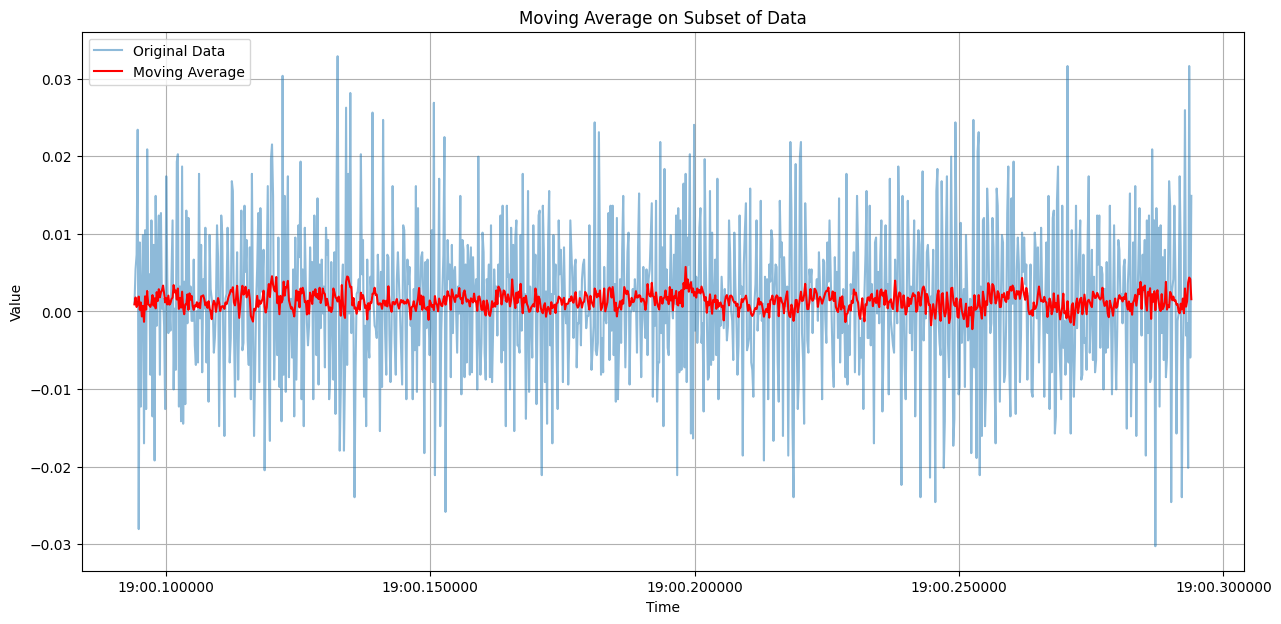

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 경로
file_path = './csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_19.csv'  # 실제 파일 경로로 변경해야 합니다.

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 'time' 컬럼을 datetime 객체로 변환
data['time'] = pd.to_datetime(data['time'], errors='coerce')

# 데이터프레임의 인덱스를 시간으로 설정
data.set_index('time', inplace=True)

# 데이터의 처음 100개의 샘플만 선택
data_subset = data.iloc[:1000]

# 이동 평균을 위한 컨볼루션 윈도우 생성
window_size = 10  # 이동 평균의 윈도우 사이즈
window = np.ones(window_size) / window_size

# 이동 평균을 위한 컨볼루션 윈도우 적용
value_column = data.columns[0]  # 가정: 첫 번째 컬럼이 값을 담고 있음
data_subset['moving_avg'] = np.convolve(data_subset[value_column], window, 'same')[:1000]

# 시각화
plt.figure(figsize=(15, 7))
plt.plot(data_subset.index, data_subset[value_column], label='Original Data', alpha=0.5)
plt.plot(data_subset.index, data_subset['moving_avg'], label='Moving Average', color='red')
plt.title('Moving Average on Subset of Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


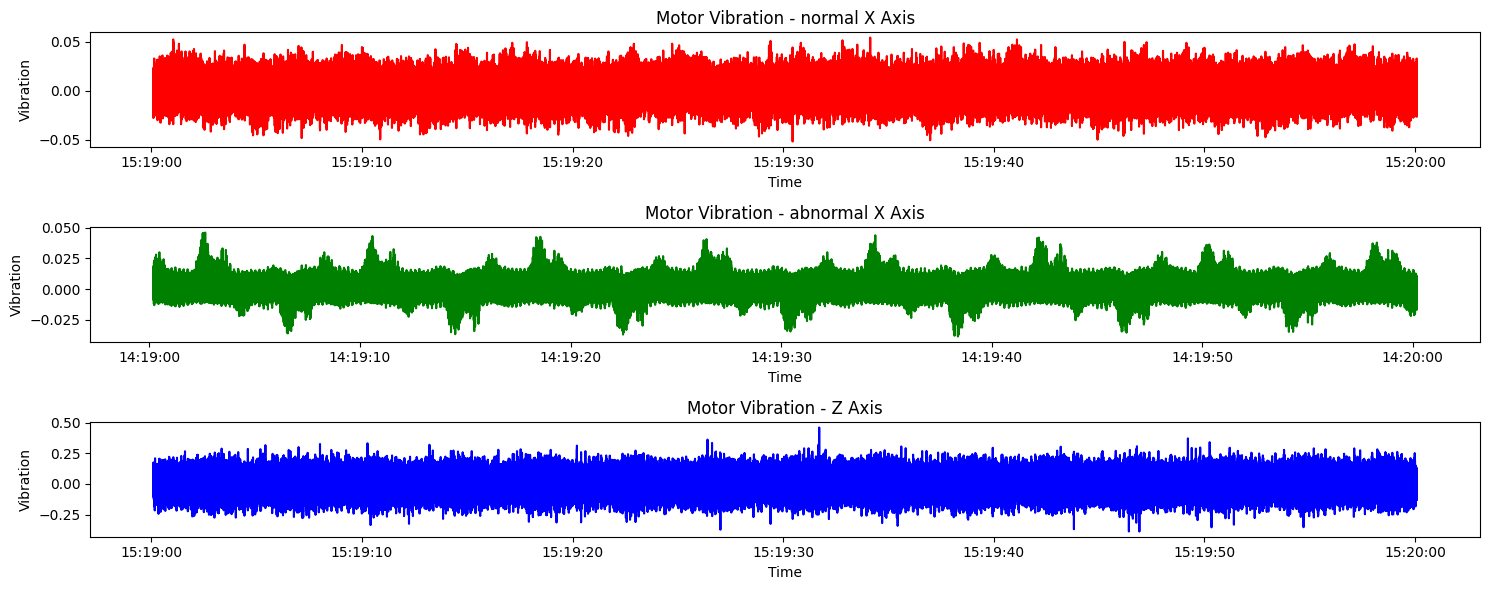

            motor1_x       motor1_y       motor1_z          sound   
count  300000.000000  300000.000000  300000.000000  300000.000000  \
mean        0.001305       0.000691      -0.000852      -0.007263   
min        -0.052008      -0.000579      -0.388027      -0.034654   
25%        -0.005943       0.000367      -0.052639      -0.008152   
50%         0.001314       0.000683      -0.001526      -0.007205   
75%         0.008572       0.000998       0.050542      -0.006574   
max         0.054329       0.002261       0.459201       0.018986   
std         0.010825       0.000339       0.075408       0.002632   

                                time  
count                         299999  
mean   2024-04-22 15:19:30.096765440  
min       2024-04-22 15:19:00.094122  
25%    2024-04-22 15:19:15.091986944  
50%    2024-04-22 15:19:30.092164096  
75%    2024-04-22 15:19:45.088976896  
max       2024-04-22 15:20:00.091046  
std                              NaN  


In [19]:
# 시간 데이터 변환 (필요한 경우)
data_normal['time'] = pd.to_datetime(data_normal['time'], errors='coerce').dt.tz_localize(None)
data_abnormal['time'] = pd.to_datetime(data_abnormal['time'], errors='coerce').dt.tz_localize(None)
# 시간에 따른 진동 데이터 시각화
plt.figure(figsize=(15, 6))
plt.subplot(3, 1, 1)
plt.plot(data_normal['time'], data_normal['motor1_x'], label='normal X Axis', color='red')
plt.title('Motor Vibration - normal X Axis')
plt.xlabel('Time')
plt.ylabel('Vibration')

plt.subplot(3, 1, 2)
plt.plot(data_abnormal['time'], data_abnormal['motor1_x'], label='abnormal X Axis', color='green')
plt.title('Motor Vibration - abnormal X Axis')
plt.xlabel('Time')
plt.ylabel('Vibration')

plt.subplot(3, 1, 3)
plt.plot(data_normal['time'], data_normal['motor1_z'], label='Z Axis', color='blue')
plt.title('Motor Vibration - Z Axis')
plt.xlabel('Time')
plt.ylabel('Vibration')
plt.tight_layout()
plt.show()

# 기본 통계 요약
print(data_normal.describe())

# 시간 기반의 분석이 필요한 경우, 시간 간격에 따른 평균, 표준편차 등을 계산할 수 있습니다.



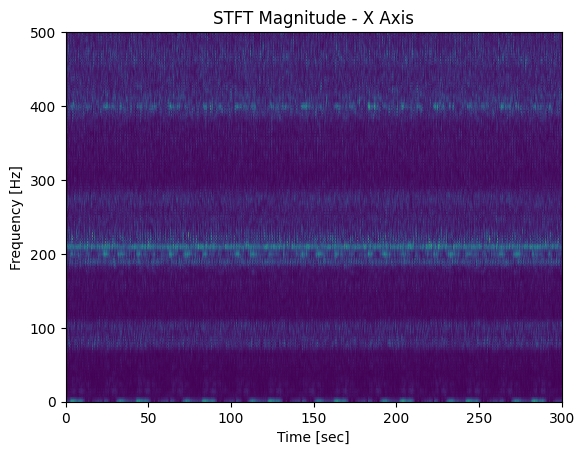

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 신호 데이터 설정 (예: 'motor_x' 축)
signal_data = data_normal['motor1_x']

# 샘플링 레이트 설정 (데이터에 따라 조정 필요)
fs = 1000  # 예시로 1000Hz를 사용

# STFT 계산
frequencies, times, Zxx = signal.stft(signal_data, fs)

# STFT 결과 시각화
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude - X Axis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


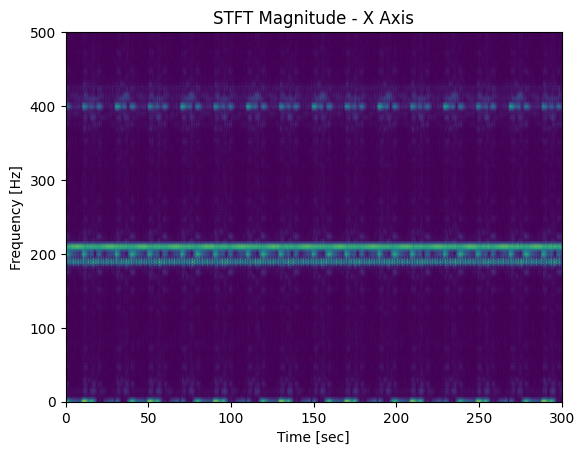

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# 신호 데이터 설정 (예: 'motor_x' 축)
signal_data = data_abnormal['motor1_x']

# 샘플링 레이트 설정 (데이터에 따라 조정 필요)
fs = 1000  # 예시로 1000Hz를 사용

# STFT 계산
frequencies, times, Zxx = signal.stft(signal_data, fs)

# STFT 결과 시각화
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude - X Axis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


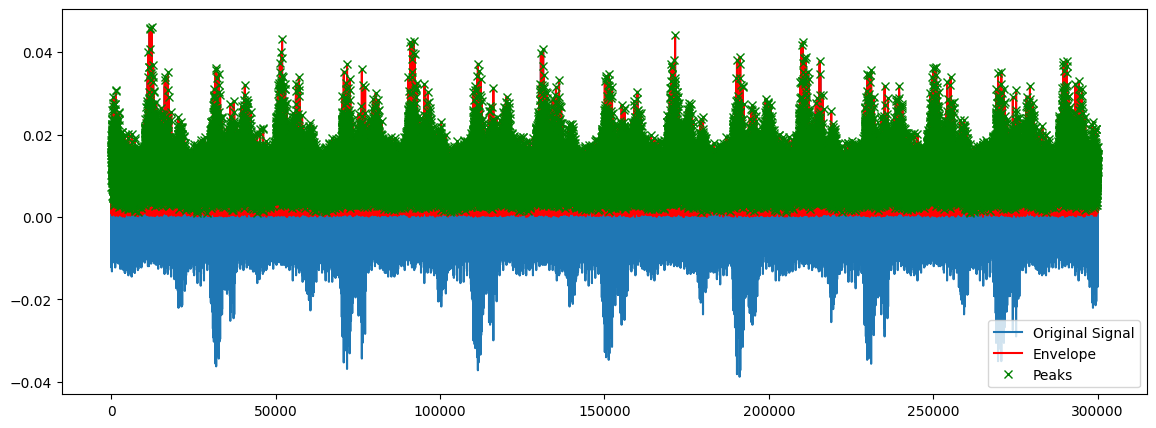

In [23]:
from scipy.signal import hilbert, find_peaks

# 진동 데이터 예시로 'signal_data'를 사용합니다.
# signal_data = data['vibration_signal'] # 실제 데이터셋의 진동 신호 컬럼을 사용하세요.

# 신호 데이터 설정 (예: 'motor_x' 축)
signal_data = data_abnormal['motor1_x']

# 힐버트 변환을 이용한 Envelope Detection
analytic_signal = hilbert(signal_data)
envelope = np.abs(analytic_signal)

# 환봉 도표 피크 찾기 (충격 펄스 식별)
peaks, _ = find_peaks(envelope, height=0) # 높이 임계값은 데이터에 맞게 조정할 필요가 있을 수 있습니다.

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(signal_data, label='Original Signal')
plt.plot(envelope, label='Envelope', color='red')
plt.plot(peaks, envelope[peaks], "x", color='green', label='Peaks')
plt.legend()
plt.show()


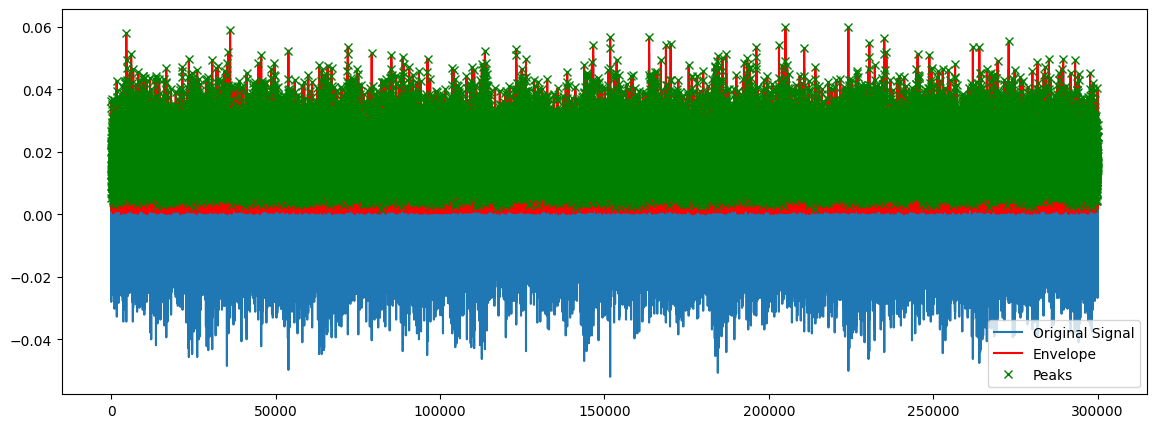

In [24]:
from scipy.signal import hilbert, find_peaks

# 진동 데이터 예시로 'signal_data'를 사용합니다.
# signal_data = data['vibration_signal'] # 실제 데이터셋의 진동 신호 컬럼을 사용하세요.

# 신호 데이터 설정 (예: 'motor_x' 축)
signal_data = data_normal['motor1_x']

# 힐버트 변환을 이용한 Envelope Detection
analytic_signal = hilbert(signal_data)
envelope = np.abs(analytic_signal)

# 환봉 도표 피크 찾기 (충격 펄스 식별)
peaks, _ = find_peaks(envelope, height=0) # 높이 임계값은 데이터에 맞게 조정할 필요가 있을 수 있습니다.

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(signal_data, label='Original Signal')
plt.plot(envelope, label='Envelope', color='red')
plt.plot(peaks, envelope[peaks], "x", color='green', label='Peaks')
plt.legend()
plt.show()


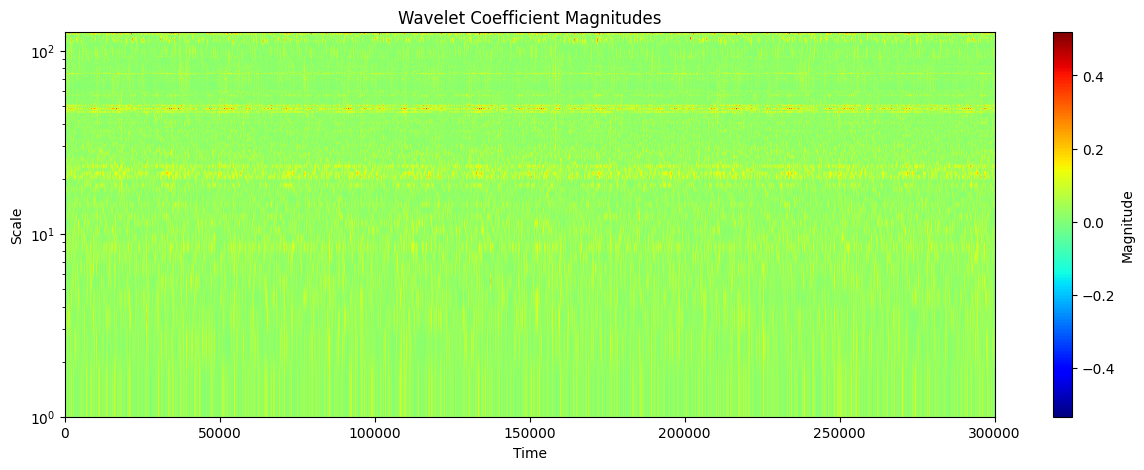

In [25]:
import pywt

# Continuous Wavelet Transform (CWT)
# 'signal_data'는 분석할 진동 데이터입니다.
# scales는 Wavelet 변환을 수행할 스케일의 배열입니다.
signal_data = data_normal['motor1_z']

scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal_data, scales, 'morl')

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.imshow(np.abs(coefficients), extent=[0, len(signal_data), 1, max(scales)], cmap='jet', aspect='auto',
           vmax=np.max(coefficients), vmin=np.min(coefficients))
plt.yscale('log')
plt.colorbar(label='Magnitude')
plt.title('Wavelet Coefficient Magnitudes')
plt.ylabel('Scale')
plt.xlabel('Time')
plt.show()


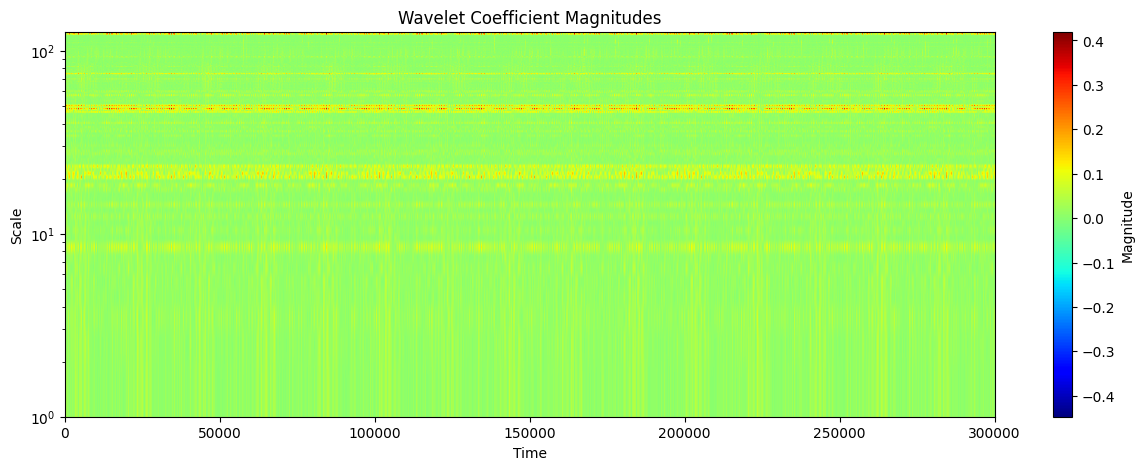

In [26]:
import pywt

# Continuous Wavelet Transform (CWT)
# 'signal_data'는 분석할 진동 데이터입니다.
# scales는 Wavelet 변환을 수행할 스케일의 배열입니다.
signal_data = data_abnormal['motor1_z']

scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal_data, scales, 'morl')

# 결과 시각화
plt.figure(figsize=(15, 5))
plt.imshow(np.abs(coefficients), extent=[0, len(signal_data), 1, max(scales)], cmap='jet', aspect='auto',
           vmax=np.max(coefficients), vmin=np.min(coefficients))
plt.yscale('log')
plt.colorbar(label='Magnitude')
plt.title('Wavelet Coefficient Magnitudes')
plt.ylabel('Scale')
plt.xlabel('Time')
plt.show()


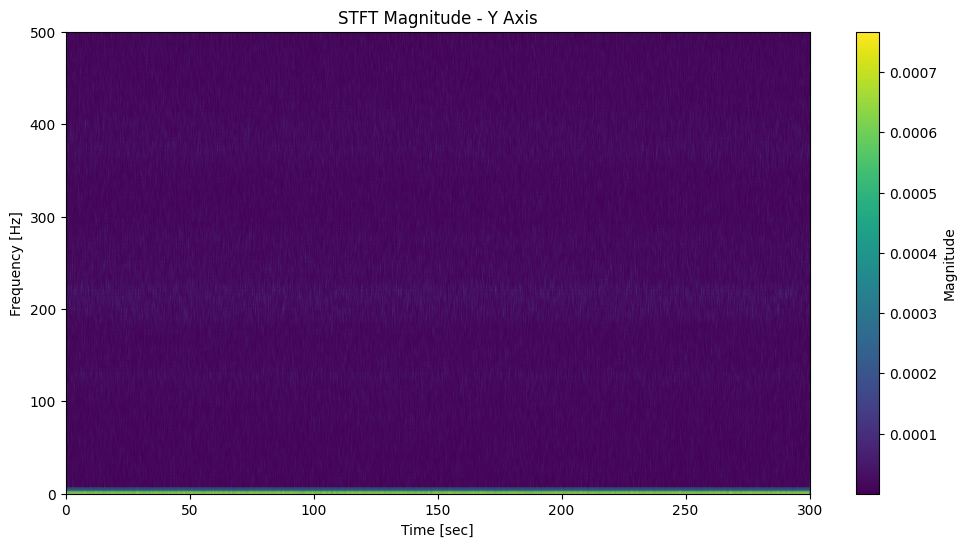

In [28]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

# motor_y 축에 대한 STFT 계산
frequencies_y, times_y, Zxx_y = signal.stft(data_normal['motor1_y'], fs)

# motor_y 축에 대한 STFT 결과 시각화
plt.figure(figsize=(12, 6))
plt.pcolormesh(times_y, frequencies_y, np.abs(Zxx_y), shading='gouraud')
plt.title('STFT Magnitude - Y Axis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()


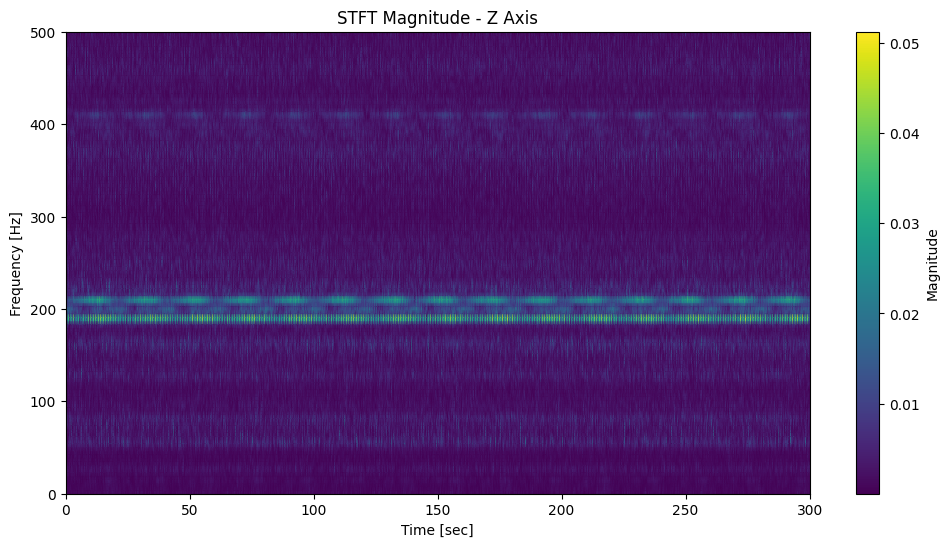

In [29]:
# motor_z 축에 대한 STFT 계산
frequencies_z, times_z, Zxx_z = signal.stft(data_normal['motor1_z'], fs)

# motor_z 축에 대한 STFT 결과 시각화
plt.figure(figsize=(12, 6))
plt.pcolormesh(times_z, frequencies_z, np.abs(Zxx_z), shading='gouraud')
plt.title('STFT Magnitude - Z Axis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()


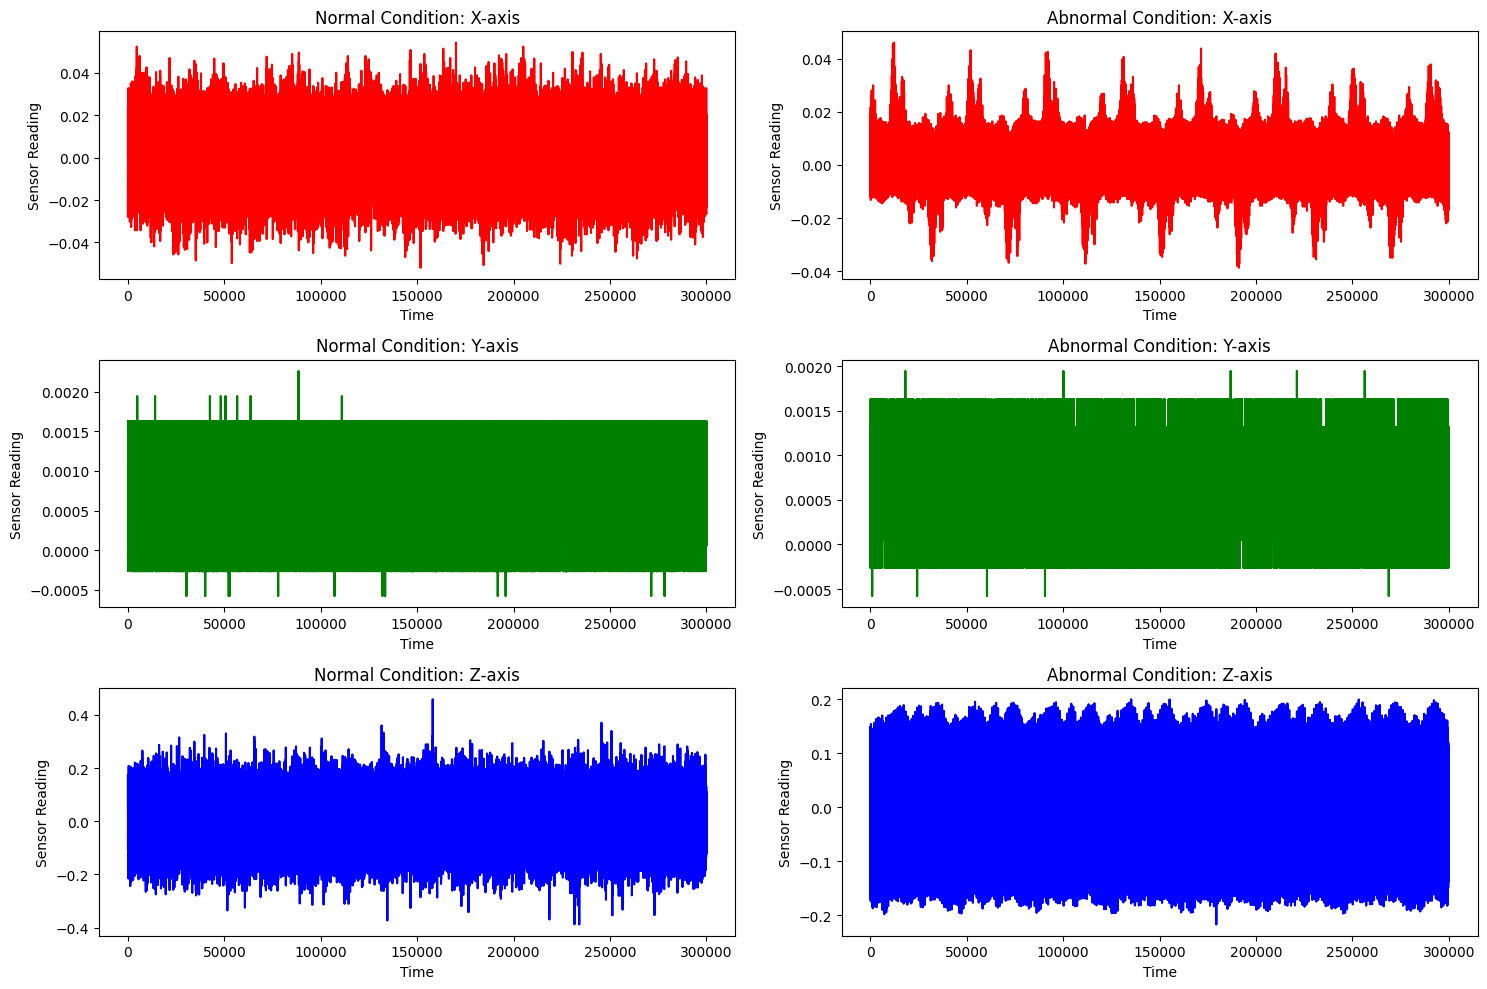

In [30]:


# 시각화: 총 6개의 그래프
plt.figure(figsize=(15, 10))

# 정상 상태: X-axis
plt.subplot(3, 2, 1)
plt.plot(data_normal['motor1_x'], color='red')
plt.title('Normal Condition: X-axis')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')

# 비정상 상태: X-axis
plt.subplot(3, 2, 2)
plt.plot(data_abnormal['motor1_x'], color='red')
plt.title('Abnormal Condition: X-axis')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')

# 정상 상태: Y-axis
plt.subplot(3, 2, 3)
plt.plot(data_normal['motor1_y'], color='green')
plt.title('Normal Condition: Y-axis')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')

# 비정상 상태: Y-axis
plt.subplot(3, 2, 4)
plt.plot(data_abnormal['motor1_y'], color='green')
plt.title('Abnormal Condition: Y-axis')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')

# 정상 상태: Z-axis
plt.subplot(3, 2, 5)
plt.plot(data_normal['motor1_z'], color='blue')
plt.title('Normal Condition: Z-axis')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')

# 비정상 상태: Z-axis
plt.subplot(3, 2, 6)
plt.plot(data_abnormal['motor1_z'], color='blue')
plt.title('Abnormal Condition: Z-axis')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')

plt.tight_layout()
plt.show()


Normal Condition Statistics:
            motor1_x       motor1_y       motor1_z          sound   
count  300000.000000  300000.000000  300000.000000  300000.000000  \
mean        0.001305       0.000691      -0.000852      -0.007263   
min        -0.052008      -0.000579      -0.388027      -0.034654   
25%        -0.005943       0.000367      -0.052639      -0.008152   
50%         0.001314       0.000683      -0.001526      -0.007205   
75%         0.008572       0.000998       0.050542      -0.006574   
max         0.054329       0.002261       0.459201       0.018986   
std         0.010825       0.000339       0.075408       0.002632   

                                time  
count                         299999  
mean   2024-04-22 15:19:30.096765440  
min       2024-04-22 15:19:00.094122  
25%    2024-04-22 15:19:15.091986944  
50%    2024-04-22 15:19:30.092164096  
75%    2024-04-22 15:19:45.088976896  
max       2024-04-22 15:20:00.091046  
std                              NaN 

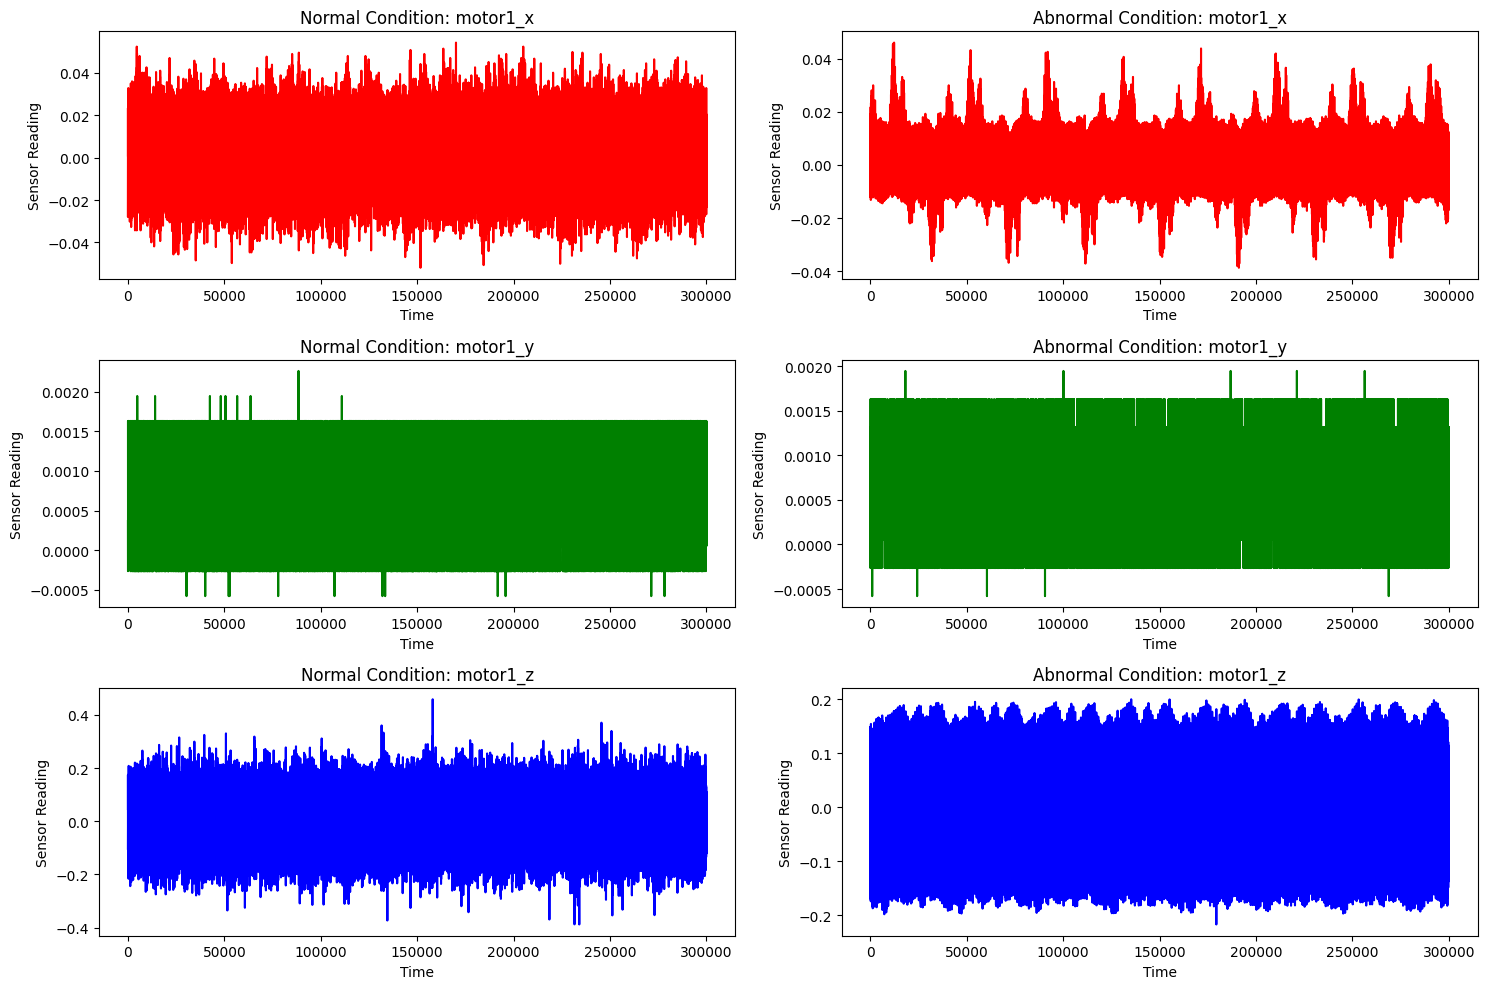

In [31]:
# 기본 통계 계산 및 출력
print("Normal Condition Statistics:")
print(data_normal.describe())
print("Abnormal Condition Statistics:")
print(data_abnormal.describe())

# 시각화
axes = ['motor1_x', 'motor1_y', 'motor1_z']
colors = ['red', 'green', 'blue']

plt.figure(figsize=(15, 10))

for i, axis in enumerate(axes):
    # 정상 상태
    plt.subplot(3, 2, 2*i + 1)
    plt.plot(data_normal[axis], color=colors[i])
    plt.title(f'Normal Condition: {axis}')
    plt.xlabel('Time')
    plt.ylabel('Sensor Reading')

    # 비정상 상태
    plt.subplot(3, 2, 2*i + 2)
    plt.plot(data_abnormal[axis], color=colors[i])
    plt.title(f'Abnormal Condition: {axis}')
    plt.xlabel('Time')
    plt.ylabel('Sensor Reading')

plt.tight_layout()
plt.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, Dropout, LayerNormalization, Flatten


# 정상 상태와 비정상 상태에 레이블 지정
data_normal['label'] = 0  # 정상: 0
data_abnormal['label'] = 1 # 비정상: 1

# 데이터 결합
data_combined = pd.concat([data_normal, data_abnormal])

# 피처와 레이블 분리
X = data_combined[['motor1_x', 'motor1_y', 'motor1_z']]
y = data_combined['label']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = np.expand_dims(X_train, axis=1)  # X_train의 형태를 (batch_size, 1, 3)으로 변경
X_test = np.expand_dims(X_test, axis=1)    # X_test의 형태를 (batch_size, 1, 3)으로 변경
# # 모델 생성 및 훈련
# model = LogisticRegression()
# model.fit(X_train, y_train)

def transformer_block(inputs):
    x = MultiHeadAttention(num_heads=2, key_dim=2)(inputs, inputs)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(inputs + x)
    x = Dense(64, activation='relu')(x)
    return LayerNormalization(epsilon=1e-6)(x)

# 모델 구성
input_layer = Input(shape=(1, 3))
x = transformer_block(input_layer)
x = Flatten()(x)
output_layer = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 평가
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)
print(classification_report(y_test, predictions))

# # 모델 평가
# predictions = model.predict(X_test)
# print(classification_report(y_test, predictions))


Epoch 1/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 7s 593us/step - accuracy: 0.5815 - loss: 0.6629 - val_accuracy: 0.6333 - val_loss: 0.6306
Epoch 2/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 6s 570us/step - accuracy: 0.6328 - loss: 0.6340 - val_accuracy: 0.6369 - val_loss: 0.6280
Epoch 3/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 6s 561us/step - accuracy: 0.6363 - loss: 0.6315 - val_accuracy: 0.6403 - val_loss: 0.6260
Epoch 4/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 6s 560us/step - accuracy: 0.6393 - loss: 0.6302 - val_accuracy: 0.6439 - val_loss: 0.6219
Epoch 5/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 6s 564us/step - accuracy: 0.6458 - loss: 0.6233 - val_accuracy: 0.6523 - val_loss: 0.6163
Epoch 6/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 6s 576us/step - accuracy: 0.6509 - loss: 0.6201 - val_accuracy: 0.6579 - val_loss: 0.6137
Epoch 7/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 6s 581us/step - accuracy: 0.6527 - loss: 0.6183 - val_accuracy: 0.6449 - val_loss: 0.6205
Epoch 8/10
10500/10500 ━━━━━━━━━━━━━━━━━━━━ 6s 568us/step - ac

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# 정상 상태와 비정상 상태에 레이블 지정
data_normal['label'] = 0  # 정상: 0
data_abnormal['label'] = 1 # 비정상: 1

# 데이터 결합
data_combined = pd.concat([data_normal, data_abnormal])

# 피처와 레이블 분리
X = data_combined[['motor1_x', 'motor1_y', 'motor1_z']]
y = data_combined['label']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.61      0.58      0.59     89961
           1       0.60      0.62      0.61     90039

    accuracy                           0.60    180000
   macro avg       0.60      0.60      0.60    180000
weighted avg       0.60      0.60      0.60    180000



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 정상 상태와 비정상 상태에 레이블 지정
data_normal['label'] = 0  # 정상: 0
data_abnormal['label'] = 1 # 비정상: 1

# 데이터 결합
data_combined = pd.concat([data_normal, data_abnormal])

# 축 별 데이터셋 생성
datasets = {
    'X': data_combined[['motor1_x', 'label']],
    'Y': data_combined[['motor1_y', 'label']],
    'Z': data_combined[['motor1_z', 'label']]
}

# 각 축 별로 모델 훈련 및 평가
for axis, dataset in datasets.items():
    # 피처와 레이블 분리
    X = dataset.drop('label', axis=1)
    y = dataset['label']

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # 모델 생성 및 훈련
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 모델 평가
    predictions = model.predict(X_test)
    print(f"Axis: {axis}")
    print(classification_report(y_test, predictions))


Axis: X
              precision    recall  f1-score   support

           0       0.71      0.40      0.51     89961
           1       0.58      0.84      0.69     90039

    accuracy                           0.62    180000
   macro avg       0.65      0.62      0.60    180000
weighted avg       0.65      0.62      0.60    180000

Axis: Y
              precision    recall  f1-score   support

           0       0.54      0.43      0.48     89961
           1       0.53      0.63      0.57     90039

    accuracy                           0.53    180000
   macro avg       0.53      0.53      0.53    180000
weighted avg       0.53      0.53      0.53    180000

Axis: Z
              precision    recall  f1-score   support

           0       0.52      0.51      0.52     89961
           1       0.52      0.53      0.52     90039

    accuracy                           0.52    180000
   macro avg       0.52      0.52      0.52    180000
weighted avg       0.52      0.52      0.52    180